Notebook em **R** que mostra procedimentos para a obtenção de uma **Regressão Linear e de uma Correlação entre variáveis** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa](#Solução-Alternativa)
* [Referências](#Referências)

## Exercício

O exercício (pág 222) menciona um experimento realizado a respeito de um processo de preparação de biscoitos num forno. Neste experimento, foi verificado a qualidade da preparação do biscoito em diferentes temperaturas de forno. Uma qualidade "1" significa que o biscoito não foi assado, "5" indica que foi perfeitamente assado e "10" significa que foi completamente queimado. O livro não cita explicitamente, mas acredito que o tempo de forno considerado neste experimento é constante, e que o forno foi anteriormente pré-aquecido para a temperatura considerada antes de realizar as medições.

Pede-se para plotar uma linha de tendência entre temperatura do forno e qualidade do biscoito e verificar se há uma correlação. Assim como no notebook [Regressão Linear - R - Six Sigma - CSSC](link://post_path/posts/regressao_linear-r-six-sigma-cssc/), usaremos a função `glm` -- Generalized Linear Model -- para traçar a regressão linear.


## Procedimento

In [1]:
# define um tamanho padrão para o gráfico
options(repr.plot.width=16, repr.plot.height=8) 

### Carregar os dados a partir do arquivo CSV

In [2]:
data <- read.csv("ch14p222.txt", header=TRUE);
data

Temperature,Doneness
<int>,<dbl>
200,1.0
225,1.2
250,2.2
275,2.4
300,4.0
325,5.0
350,5.2
375,6.2
400,8.0


### Plotar os dados no gráfico

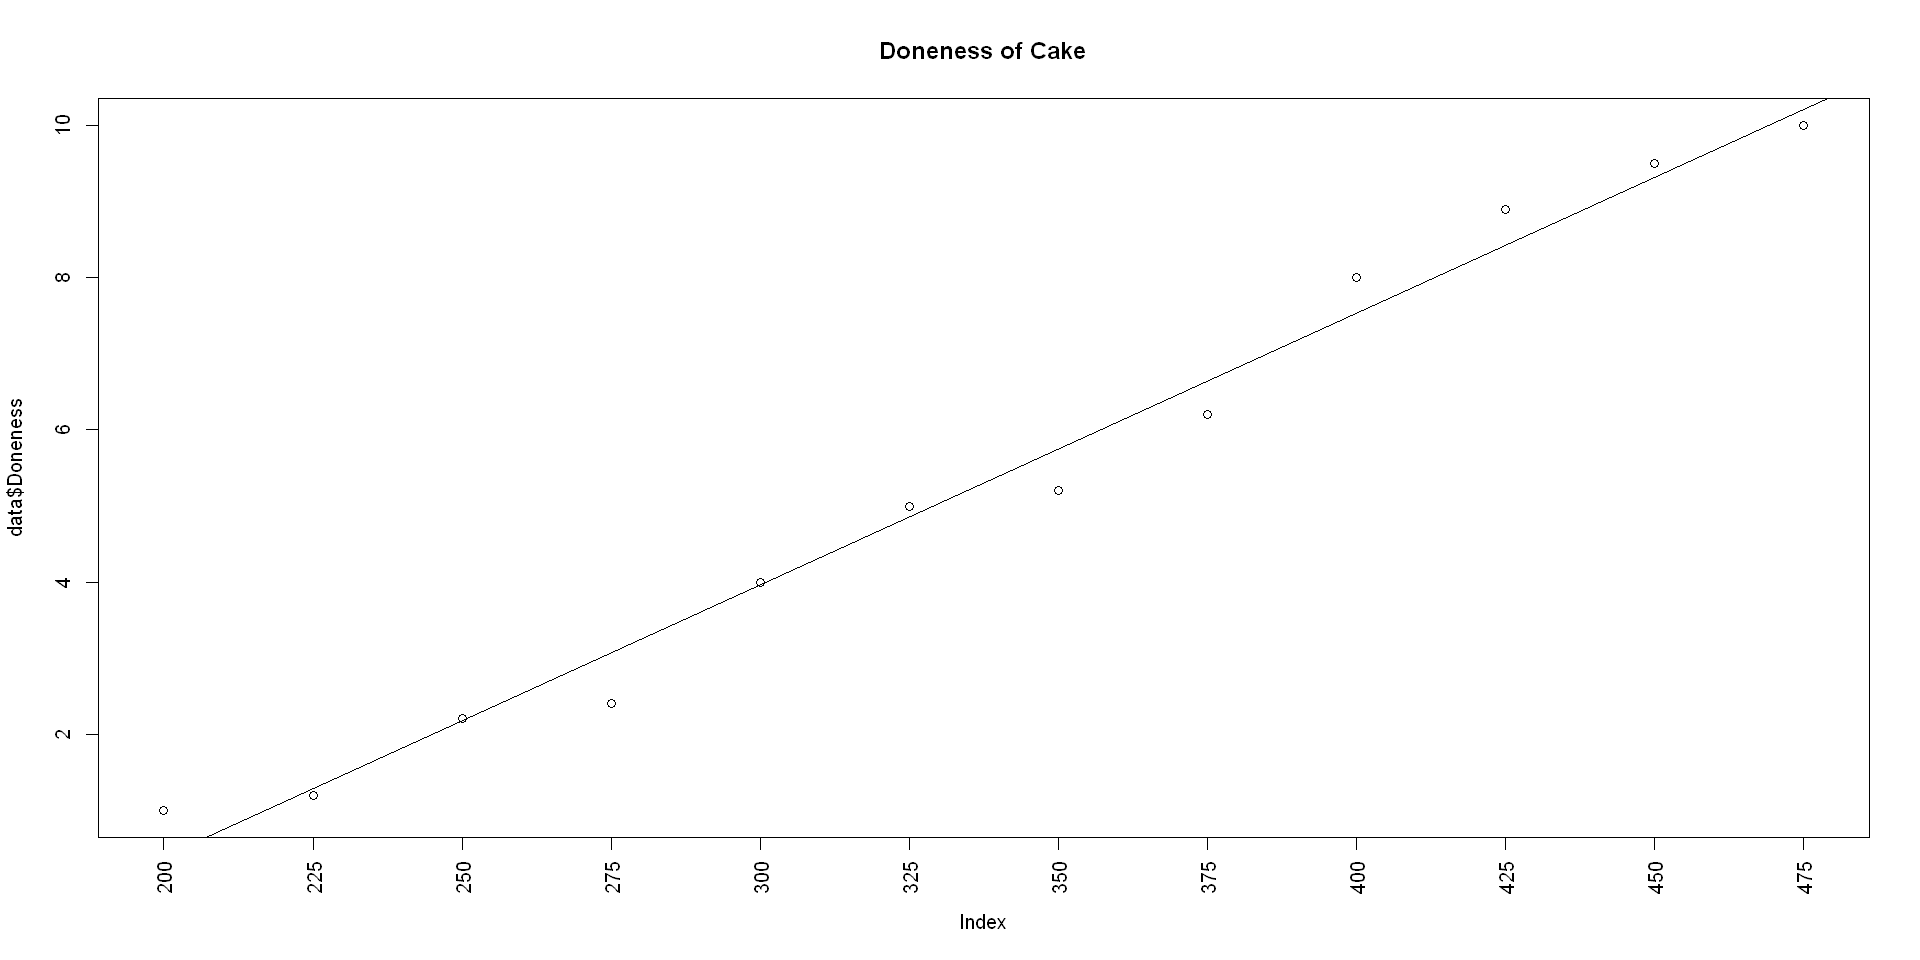

In [3]:
# Cria o gráfico de linha com os dados da tabela
plot(
    data$Doneness, 
    xaxt="n", 
    main="Doneness of Cake"
)
# Configura os eixos do gráfico
axis(1, at=seq(1, length(data$Temperature)), labels=data$Temperature, las=2)

# Cria uma linha que ajusta uma regressão nos pontos 
fit <- glm(data$Doneness ~ seq(1, length(data$Doneness)))
abline(fit)

As estatísticas básicas dos dados coletados indicam que são "bem comportados", em que `Doneness` apresenta mediana próxima a média, e os diferentes quartis estão quase que uniformemente distribuídos.

In [4]:
summary(data)

  Temperature       Doneness     
 Min.   :200.0   Min.   : 1.000  
 1st Qu.:268.8   1st Qu.: 2.350  
 Median :337.5   Median : 5.100  
 Mean   :337.5   Mean   : 5.300  
 3rd Qu.:406.2   3rd Qu.: 8.225  
 Max.   :475.0   Max.   :10.000  

O histograma abaixo evidencia este comportamento de `Doneness`, revelando uma distribuição bem próxima da retangular.

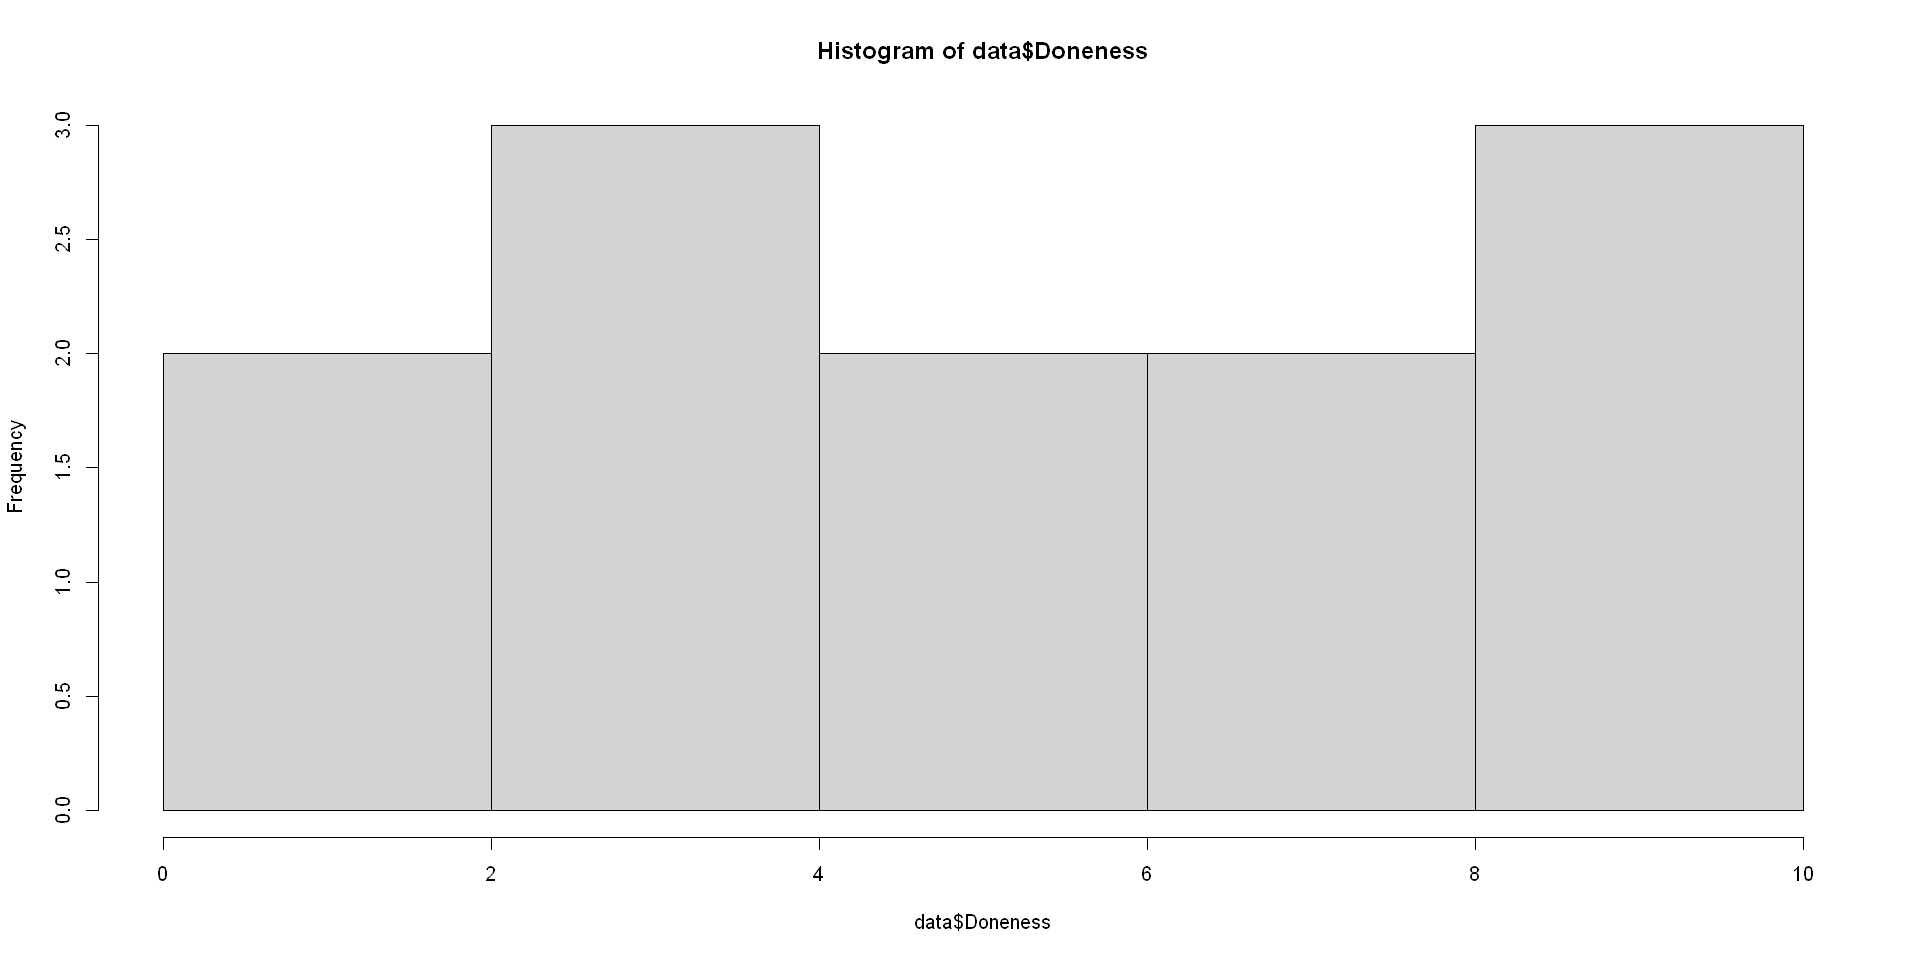

In [5]:
hist(data$Doneness)

Podemos inspecionar também o conteúdo da variavel fit e observar os valores do coeficiente angular da linha `0.8930` e o coeficiente linear `-0.5045`.

In [6]:
fit


Call:  glm(formula = data$Doneness ~ seq(1, length(data$Doneness)))

Coefficients:
                  (Intercept)  seq(1, length(data$Doneness))  
                      -0.5045                         0.8930  

Degrees of Freedom: 11 Total (i.e. Null);  10 Residual
Null Deviance:	    115.9 
Residual Deviance: 1.863 	AIC: 17.7

## Solução Alternativa

Para esta solução alternativa usaremos a excelente biblioteca `ggpubr`, cuja autoria é de [kassambara](https://github.com/kassambara/ggpubr). Para instalar, descomente e execute a linha de código abaixo:

In [7]:
# install.packages("ggpubr")

In [8]:
library("ggpubr")

Loading required package: ggplot2



Antes de plotar o gráfico de correlação usando a `ggpubr`, vamos verificar alguns resultados numéricos revelados pela função `cor.test`:

In [9]:
cor.test(data$Temperature, data$Doneness, method = c("pearson", "kendall", "spearman"))


	Pearson's product-moment correlation

data:  data$Temperature and data$Doneness
t = 24.741, df = 10, p-value = 2.659e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9705131 0.9978089
sample estimates:
      cor 
0.9919303 


`geom_smooth()` using formula 'y ~ x'



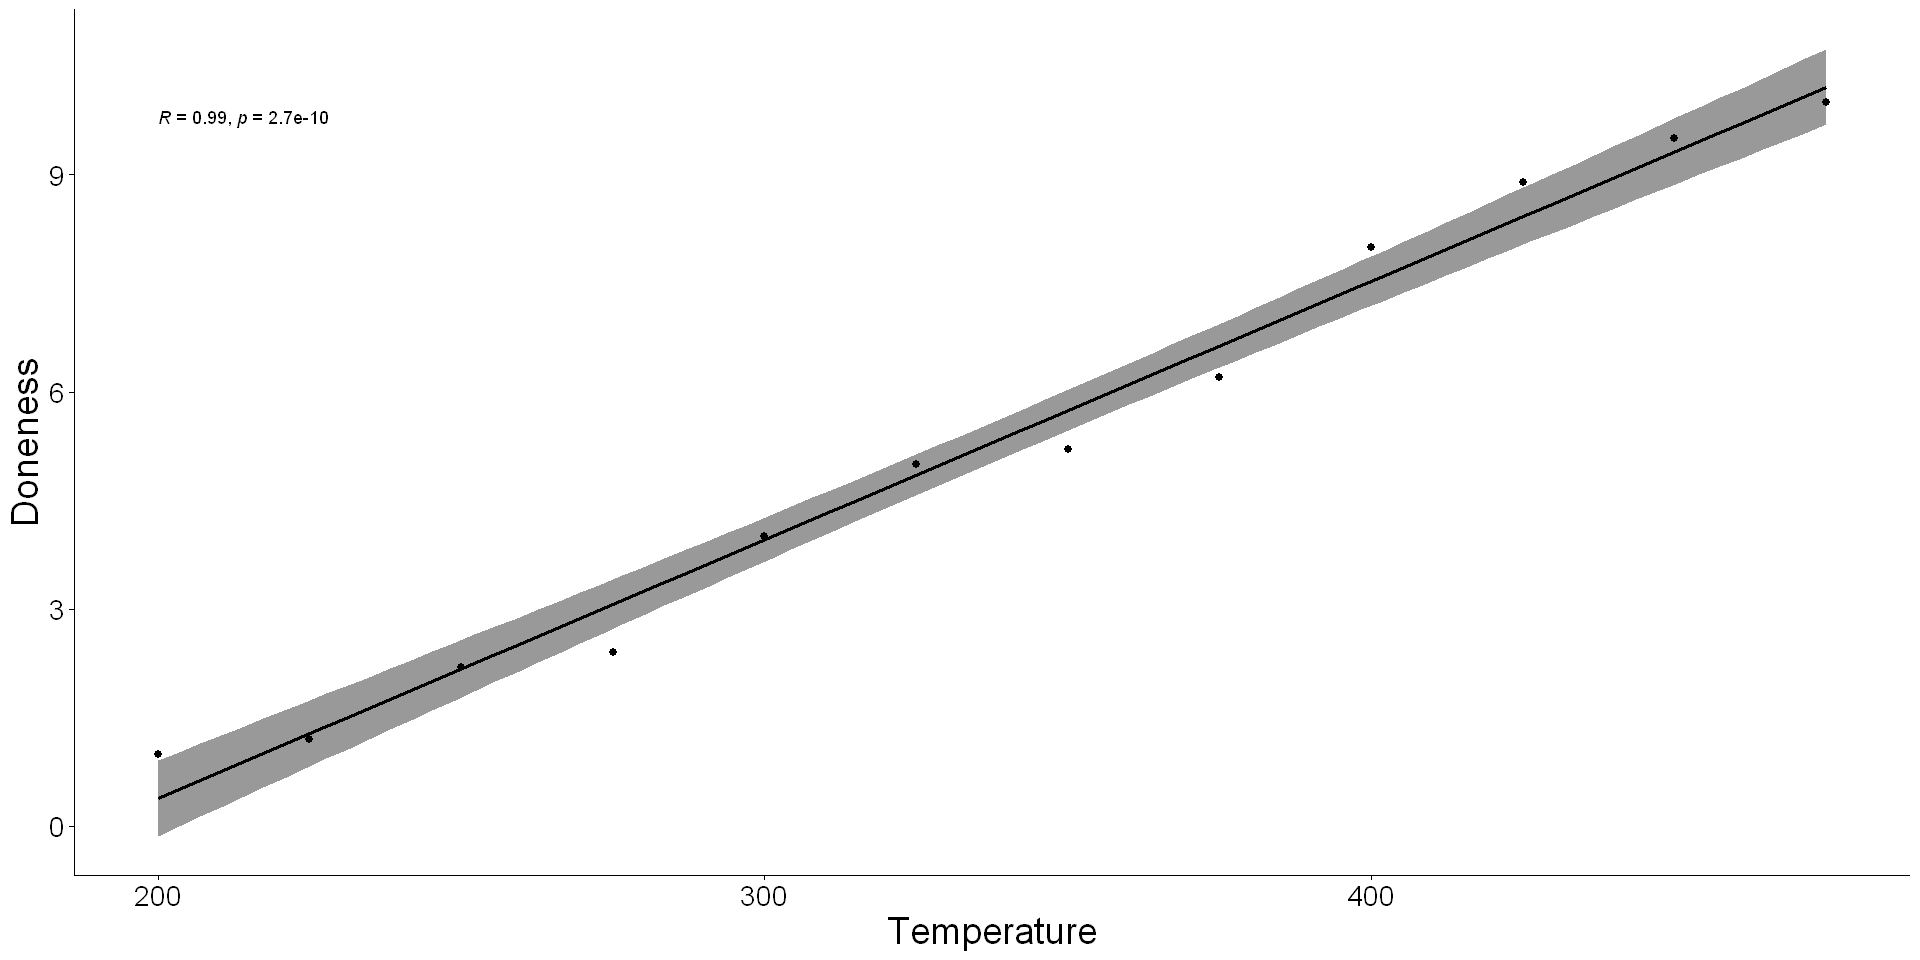

In [10]:
ggscatter(data, x = "Temperature", y = "Doneness", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Temperature", ylab = "Doneness") + 
theme(
    plot.title = element_text(size=30, hjust = 0.5), # define tamanho e alinhamento do título
    plot.subtitle = element_text(size=17, hjust = 0.5), # define tamanho e alinhamento do subtítulo
    axis.text = element_text(size=17), # define tamanho
    axis.title = element_text(size=22),# define tamanho do título do eixo
    legend.text = element_text(size=17), # define tamanho da legenda
    legend.title = element_text(size=15), # define tamanho do titulo da legenda
)

Ao observar o gráfico acima, fica nítido a correlação entre temperatura do forno e a qualidade do biscoito.

## Referências

Este notebook contém exemplos do livro Six Sigma: A Complete Step-by-Step Guide disponibilizado pelo The Council for Six Sigma Certification

Consulte:

* [R Docs - glm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm)
* [cor.test](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/cor.test)
* [Correlation Test Between Two Variables in R](http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r)
